We will need to do the following:

Import our dependencies and initialize counters and an empty list that will hold the weather data.
Loop through the cities list.
Group the cities in sets of 50 to log the process as we find the weather data for each city.
Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
Build the city_url or endpoint for each city.
Log the URL and the record and set numbers.
Make an API request for each city.
Parse the JSON weather data for the following:
City, country, and date
Latitude and longitude
Maximum temperature
Humidity
Cloudiness
Wind speed
Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [1]:
%matplotlib inline

In [2]:
#add Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import timeit
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)
    
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [4]:
cities
    

['cockburn town', 'gat', 'parvatsar', 'punta arenas', 'saint george']

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city = "Boston" 
city_url = url + "&q=" + "Boston"
weather_response = requests.get(city_url)
if weather_response.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [6]:
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 70.57,
  'feels_like': 70.29,
  'temp_min': 64.67,
  'temp_max': 75.09,
  'pressure': 1010,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 8.01, 'deg': 279, 'gust': 17},
 'clouds': {'all': 55},
 'dt': 1632765243,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632739027,
  'sunset': 1632781985},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [7]:
# Get the JSON data.
boston_data = weather_response.json()

In [8]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 75.09 63 55 8.01


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-27 17:54:03'

In [10]:
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [13]:
#Empty city_data list
city_data = []
print('Log Start')
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Log Start
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | comrat
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | homocea
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | san jeronimo
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | sterling
Processing Record 11 of Set 1 | neuquen
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | beihai
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | dehloran
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | sheboygan
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | mataura
Processing

Processing Record 43 of Set 4 | akom
Processing Record 44 of Set 4 | abha
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | toliary
City not found. Skipping...
Processing Record 49 of Set 4 | pochutla
Processing Record 50 of Set 4 | el faiyum
City not found. Skipping...
Processing Record 1 of Set 5 | christchurch
Processing Record 2 of Set 5 | amalapuram
Processing Record 3 of Set 5 | laem sing
Processing Record 4 of Set 5 | ploemeur
Processing Record 5 of Set 5 | ambilobe
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | inta
Processing Record 8 of Set 5 | san ramon
Processing Record 9 of Set 5 | jimma
Processing Record 10 of Set 5 | sola
Processing Record 11 of Set 5 | fairbanks
Processing Record 12 of Set 5 | umm ruwabah
City not found. Skipping...
Processing Record 13 of Set 5 | isangel
Processing Record 14 of Set 5 | salalah
Processing Record 15 of Set 5 | paradwip
C

Processing Record 26 of Set 8 | wilmington
Processing Record 27 of Set 8 | lazaro cardenas
Processing Record 28 of Set 8 | bouna
Processing Record 29 of Set 8 | visnes
Processing Record 30 of Set 8 | aquiraz
Processing Record 31 of Set 8 | los llanos de aridane
Processing Record 32 of Set 8 | andilamena
Processing Record 33 of Set 8 | kasongo-lunda
Processing Record 34 of Set 8 | prince albert
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | itarema
Processing Record 37 of Set 8 | moore
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | nebolchi
Processing Record 41 of Set 8 | beloha
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | royan
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | jiayuguan
Processing Record 46 of Set 8 | sabang
Processing Record 47 of Set 8 | muskegon heights
Processing Record 48 of Set 8 | santa vitoria do palmar


Processing Record 14 of Set 12 | bima
Processing Record 15 of Set 12 | ayabaca
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | jurm
Processing Record 18 of Set 12 | mahanoro
Processing Record 19 of Set 12 | honiara
Processing Record 20 of Set 12 | taylorville
Processing Record 21 of Set 12 | alice springs
Processing Record 22 of Set 12 | codrington
Processing Record 23 of Set 12 | arecibo
Processing Record 24 of Set 12 | pombas
Processing Record 25 of Set 12 | colomi
Processing Record 26 of Set 12 | ulety
Processing Record 27 of Set 12 | tigil
Processing Record 28 of Set 12 | cobija
Processing Record 29 of Set 12 | padang
Processing Record 30 of Set 12 | neringa
Processing Record 31 of Set 12 | gornopravdinsk
Processing Record 32 of Set 12 | kirkland lake
Processing Record 33 of Set 12 | shingu
Processing Record 34 of Set 12 | kushiro
Processing Record 35 of Set 12 | karaul
City not found. Skipping...
Processing Record 36 of Set 12 | tiarei
Processing Rec

In [14]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-09-27 17:53:53,-54.8000,-68.3000,51.42,53,40,5.75
1,East London,ZA,2021-09-27 17:56:47,-33.0153,27.9116,67.14,82,40,23.02
2,Comrat,MD,2021-09-27 17:56:47,46.3003,28.6572,59.09,46,56,6.80
3,Homocea,RO,2021-09-27 17:56:47,46.1333,27.2333,64.02,60,81,4.21
4,Arraial Do Cabo,BR,2021-09-27 17:56:48,-22.9661,-42.0278,80.56,69,40,16.11


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#scatter plot

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')


C:\Users\auste\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


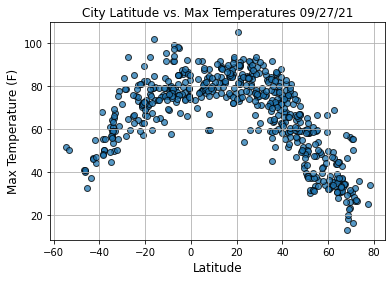

In [17]:


fig, ax = plt.subplots()
ax.scatter(lats,max_temps, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Max Temperatures ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Max Temperature (F)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

fig.show()

C:\Users\auste\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


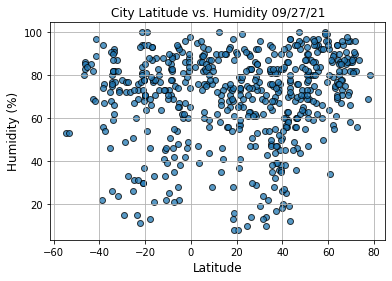

In [18]:
#plot for Lat v Humidity

fig, ax = plt.subplots()
ax.scatter(lats,humidity, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Humidity ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Humidity (%)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

fig.show()

C:\Users\auste\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


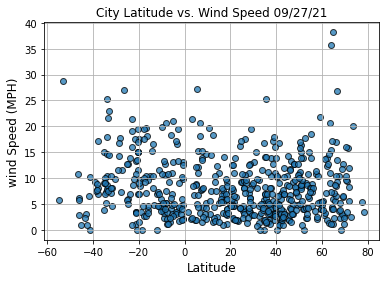

In [19]:
#plot for Lat v Cloudiness
fig, ax = plt.subplots()
ax.scatter(lats, wind_speed, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Wind Speed ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('wind Speed (MPH)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

fig.show()

C:\Users\auste\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


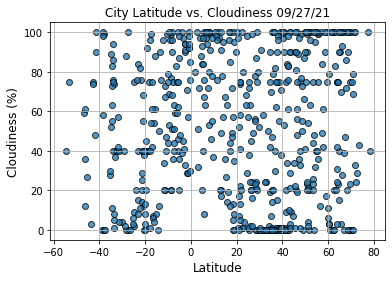

In [21]:
#plot for Lat v Wind Speed

fig, ax = plt.subplots()
ax.scatter(lats, cloudiness, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Cloudiness ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Cloudiness (%)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

fig.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

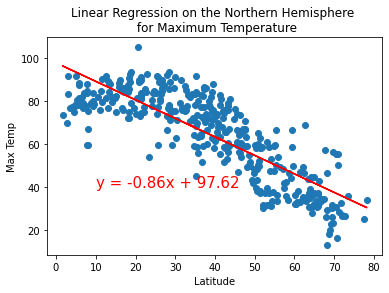

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

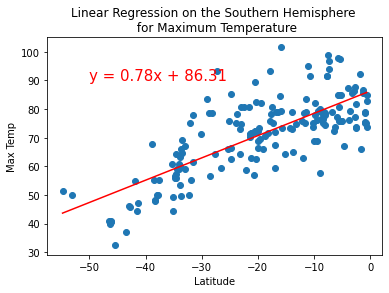

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

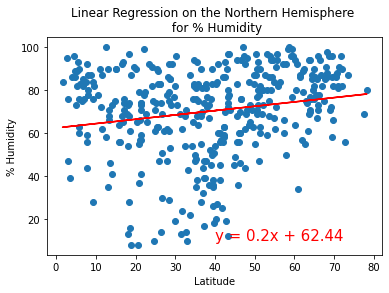

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

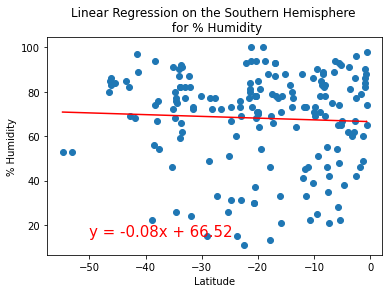

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

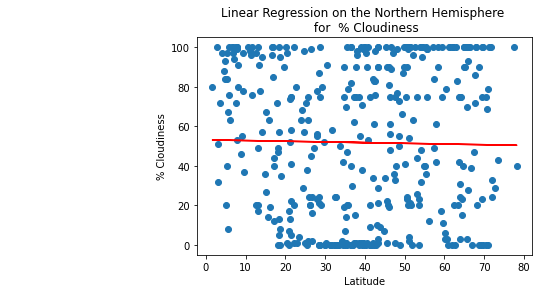

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for  % Cloudiness', '% Cloudiness',(-50,15))

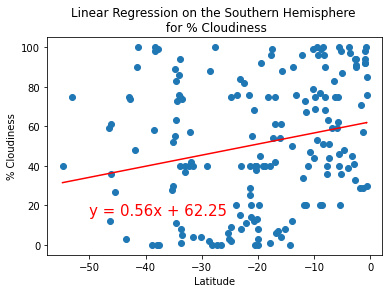

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

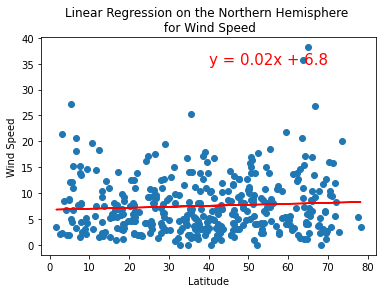

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

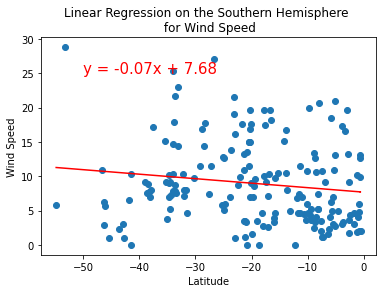

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))